In [205]:
#Importing librairies

import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)



import itertools

# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib as mpl

# Library for the statistic data vizualisation
import seaborn as sns


# Scikit-learn library: 
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

from sklearn.model_selection import GridSearchCV

#Import time related library
import datetime
import requests
import time

In [206]:
import os, glob
path = r"C:\Users\annab\OneDrive\Documents\Python jobs\Hertfordshire Crime data analysis"
all_files = glob.glob(os.path.join(path, "2020-*.csv"))

df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
df_merged_2020   = pd.concat(df_from_each_file, ignore_index=True)
df_merged_2020.to_csv( "2020_merged_search and stop_data.csv")

In [207]:
df_merged_2020.head(5)

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2020-01-01T03:55:00+00:00,False,NaN,NaN,NaN,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,NaN,False
1,Person search,2020-01-01T04:18:00+00:00,False,NaN,51.725023,-0.302372,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,Arrest,True,False
2,Person search,2020-01-01T07:15:28+00:00,False,NaN,NaN,NaN,Male,18-24,Asian/Asian British - Any other Asian background,Asian,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,NaN,False
3,Vehicle search,2020-01-01T15:32:18+00:00,False,NaN,52.048457,-0.025856,NaN,NaN,NaN,NaN,Firearms Act 1968 (section 47),Firearms,A no further action disposal,NaN,False
4,Person search,2020-01-01T19:49:00+00:00,True,NaN,NaN,NaN,Male,10-17,Mixed/Multiple ethnic groups - Any other Mixed...,Black,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False


In [208]:
df = df_merged_2020
df.isnull().sum()

Type                                           0
Date                                           0
Part of a policing operation                   0
Policing operation                          9205
Latitude                                    3124
Longitude                                   3124
Gender                                       403
Age range                                    621
Self-defined ethnicity                       574
Officer-defined ethnicity                    590
Legislation                                    0
Object of search                               0
Outcome                                        2
Outcome linked to object of search          7013
Removal of more than just outer clothing       9
dtype: int64

### Dropping columns

In [209]:

# - 'Policing_operation' has no value so can be dropped.
# - ' Outcome_linked_to_object_of_search' has too many missing value, so I will drop that colum as well

df.drop(['Policing operation','Outcome linked to object of search'], axis='columns',inplace=True)
df.shape

(9205, 13)

### Dropping rows


In [210]:
df.isnull().sum()

Type                                           0
Date                                           0
Part of a policing operation                   0
Latitude                                    3124
Longitude                                   3124
Gender                                       403
Age range                                    621
Self-defined ethnicity                       574
Officer-defined ethnicity                    590
Legislation                                    0
Object of search                               0
Outcome                                        2
Removal of more than just outer clothing       9
dtype: int64

In [211]:
# 'Gender' and 'Officer-defined_ethnicity' is important columns so we will only drop rows
# 'Age range' shall be dropped because the wide range makes it hard to know

df.dropna(subset=['Gender','Officer-defined ethnicity', 'Age range'],inplace=True)
df.isnull().sum()

Type                                           0
Date                                           0
Part of a policing operation                   0
Latitude                                    2833
Longitude                                   2833
Gender                                         0
Age range                                      0
Self-defined ethnicity                         8
Officer-defined ethnicity                      0
Legislation                                    0
Object of search                               0
Outcome                                        2
Removal of more than just outer clothing       8
dtype: int64

### Exam the proper data type

In [212]:
df.dtypes

Type                                         object
Date                                         object
Part of a policing operation                   bool
Latitude                                    float64
Longitude                                   float64
Gender                                       object
Age range                                    object
Self-defined ethnicity                       object
Officer-defined ethnicity                    object
Legislation                                  object
Object of search                             object
Outcome                                      object
Removal of more than just outer clothing     object
dtype: object

### Observation from above
- 'Date' shall be a datetime object
- 'Removal of more than just outer clothing' shall be a boolean type

In [214]:
df['Removal of more than just outer clothing'] = df['Removal of more than just outer clothing'].astype('bool')
df.dtypes

Type                                         object
Date                                         object
Part of a policing operation                   bool
Latitude                                    float64
Longitude                                   float64
Gender                                       object
Age range                                    object
Self-defined ethnicity                       object
Officer-defined ethnicity                    object
Legislation                                  object
Object of search                             object
Outcome                                      object
Removal of more than just outer clothing       bool
dtype: object

In [215]:
# convert object to datetime object
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Type                                                     object
Date                                        datetime64[ns, UTC]
Part of a policing operation                               bool
Latitude                                                float64
Longitude                                               float64
Gender                                                   object
Age range                                                object
Self-defined ethnicity                                   object
Officer-defined ethnicity                                object
Legislation                                              object
Object of search                                         object
Outcome                                                  object
Removal of more than just outer clothing                   bool
dtype: object

In [216]:
df.head(3)

,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Removal of more than just outer clothing
0,Person search,2020-01-01 03:55:00+00:00,False,NaN,NaN,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False
1,Person search,2020-01-01 04:18:00+00:00,False,51.725023,-0.302372,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,Arrest,False
2,Person search,2020-01-01 07:15:28+00:00,False,NaN,NaN,Male,18-24,Asian/Asian British - Any other Asian background,Asian,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False


In [217]:
# Set 'Date' as the index
df.set_index('Date', inplace=True)
df.head(3)

,Type,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Removal of more than just outer clothing
Date,,,,,,,,,,,,
2020-01-01 03:55:00+00:00,Person search,False,NaN,NaN,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False
2020-01-01 04:18:00+00:00,Person search,False,51.725023,-0.302372,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,Arrest,False
2020-01-01 07:15:28+00:00,Person search,False,NaN,NaN,Male,18-24,Asian/Asian British - Any other Asian background,Asian,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False


## Data Analysis

### Q1: Do the genders commit different violations?


In [218]:
# First of all I will be looking into the overall violation rate 

df['Legislation'].value_counts(normalize=True)

Misuse of Drugs Act 1971 (section 23)                      0.660026
Police and Criminal Evidence Act 1984 (section 1)          0.335202
Firearms Act 1968 (section 47)                             0.002744
Criminal Justice and Public Order Act 1994 (section 60)    0.000954
Poaching Prevention Act 1862 (section 2)                   0.000596
Psychoactive Substances Act 2016 (s36(2))                  0.000477
Name: Legislation, dtype: float64

In [219]:
# Compare violation done by gender

female = df[df['Gender']=='Female']
male = df[df['Gender']=='Male']

print(female.Legislation.value_counts(normalize=True))
print('-'*80)
print(male.Legislation.value_counts(normalize=True))

Misuse of Drugs Act 1971 (section 23)                0.70000
Police and Criminal Evidence Act 1984 (section 1)    0.29505
Firearms Act 1968 (section 47)                       0.00396
Psychoactive Substances Act 2016 (s36(2))            0.00099
Name: Legislation, dtype: float64
--------------------------------------------------------------------------------
Misuse of Drugs Act 1971 (section 23)                      0.654550
Police and Criminal Evidence Act 1984 (section 1)          0.340703
Firearms Act 1968 (section 47)                             0.002577
Criminal Justice and Public Order Act 1994 (section 60)    0.001085
Poaching Prevention Act 1862 (section 2)                   0.000678
Psychoactive Substances Act 2016 (s36(2))                  0.000407
Name: Legislation, dtype: float64


### Observation from above
- 70% of female stop&search is for drug related while 65% of male stop&search is.
- Within Female offendents, usage (percentage) of drugs is 5% higher than male usage(percentage)
- Within Male offendent, the percentage of Police and Criminal Evidence Act 1984 (section 1) is 5% higher than female 
- We shall look into the number as well rather than just %

In [221]:
print(female.Legislation.value_counts())
print('-'*80)
print(male.Legislation.value_counts())

Misuse of Drugs Act 1971 (section 23)                707
Police and Criminal Evidence Act 1984 (section 1)    298
Firearms Act 1968 (section 47)                         4
Psychoactive Substances Act 2016 (s36(2))              1
Name: Legislation, dtype: int64
--------------------------------------------------------------------------------
Misuse of Drugs Act 1971 (section 23)                      4826
Police and Criminal Evidence Act 1984 (section 1)          2512
Firearms Act 1968 (section 47)                               19
Criminal Justice and Public Order Act 1994 (section 60)       8
Poaching Prevention Act 1862 (section 2)                      5
Psychoactive Substances Act 2016 (s36(2))                     3
Name: Legislation, dtype: int64


### The observation above suggests
- There was no case of female suspects violate 'offensive weapon'
- Police stopped 6 times more male than female for violating drugs law
- Police stopped nearly 9 times more male than female for violating police and criminal edidence act

To answer the above question, yes gender commits different crime

In [223]:
### We shall also look into the police search outcome of female offendent whose crime was drug related
female_drug = df[(df['Gender']=='Female') & (df['Legislation'] == 'Misuse of Drugs Act 1971 (section 23)')]
print(female_drug.Outcome.value_counts())
print('-'*80)
male_drug = df[(df['Gender']=='Male') & (df['Legislation'] == 'Misuse of Drugs Act 1971 (section 23)')]
print(male_drug.Outcome.value_counts())

A no further action disposal       578
Community resolution                75
Arrest                              40
Summons / charged by post            5
Penalty Notice for Disorder          4
Khat or Cannabis warning             3
Caution (simple or conditional)      2
Name: Outcome, dtype: int64
--------------------------------------------------------------------------------
A no further action disposal       3460
Community resolution                594
Arrest                              493
Summons / charged by post           161
Khat or Cannabis warning             57
Caution (simple or conditional)      42
Penalty Notice for Disorder          17
Name: Outcome, dtype: int64


In [224]:
print(female_drug.Outcome.value_counts(normalize=True))
print('-'*80)
print(male_drug.Outcome.value_counts(normalize=True))

A no further action disposal       0.817539
Community resolution               0.106082
Arrest                             0.056577
Summons / charged by post          0.007072
Penalty Notice for Disorder        0.005658
Khat or Cannabis warning           0.004243
Caution (simple or conditional)    0.002829
Name: Outcome, dtype: float64
--------------------------------------------------------------------------------
A no further action disposal       0.717247
Community resolution               0.123134
Arrest                             0.102197
Summons / charged by post          0.033375
Khat or Cannabis warning           0.011816
Caution (simple or conditional)    0.008706
Penalty Notice for Disorder        0.003524
Name: Outcome, dtype: float64


### Observation from above
- It is intersting to see that within the female drug suspects, only 20% of them are real vs 30% of male 
- The arrest rate of male suspect is twice as high as female 
- So the result suggests that gender does affect the arrest rate 

### Q2: If gender affect 'Removal of more than just outer clothing'

In [226]:
df['Removal of more than just outer clothing'].mean() # Suggest only 6% suspects were asked to remove outer clothing

0.05988309674340928

In [227]:
# Using groupby to see if gender related 
df.groupby(['Gender'])['Removal of more than just outer clothing'].mean() # Male is asked just 1.5 times compared with female

Gender
Female    0.046535
Male      0.061712
Name: Removal of more than just outer clothing, dtype: float64

In [228]:
df.groupby(['Gender','Legislation'])['Removal of more than just outer clothing'].mean()

Gender  Legislation                                            
Female  Firearms Act 1968 (section 47)                             0.000000
        Misuse of Drugs Act 1971 (section 23)                      0.062235
        Police and Criminal Evidence Act 1984 (section 1)          0.010067
        Psychoactive Substances Act 2016 (s36(2))                  0.000000
Male    Criminal Justice and Public Order Act 1994 (section 60)    0.250000
        Firearms Act 1968 (section 47)                             0.000000
        Misuse of Drugs Act 1971 (section 23)                      0.084749
        Poaching Prevention Act 1862 (section 2)                   0.000000
        Police and Criminal Evidence Act 1984 (section 1)          0.017516
        Psychoactive Substances Act 2016 (s36(2))                  0.000000
Name: Removal of more than just outer clothing, dtype: float64

### Observation from above 
- It suggests that 25% of the time male suspects were asked to remove their outer clothes was due to 'Offensive weapon' reason.

### Q3 Ethnicity based Legislation

In [231]:


df.Legislation.value_counts()

Misuse of Drugs Act 1971 (section 23)                      5533
Police and Criminal Evidence Act 1984 (section 1)          2810
Firearms Act 1968 (section 47)                               23
Criminal Justice and Public Order Act 1994 (section 60)       8
Poaching Prevention Act 1862 (section 2)                      5
Psychoactive Substances Act 2016 (s36(2))                     4
Name: Legislation, dtype: int64

In [232]:
df['Officer-defined ethnicity'].value_counts(normalize=True)

White    0.713587
Black    0.163665
Asian    0.107479
Other    0.015269
Name: Officer-defined ethnicity, dtype: float64

- The above suggests that White suspects are 7 times as much as Black and Asian.And Black suspects are 6% higher than Asian 


In [233]:
White['Outcome'].value_counts(normalize=True)

A no further action disposal       0.759739
Arrest                             0.106170
Community resolution               0.092459
Summons / charged by post          0.023909
Khat or Cannabis warning           0.007858
Caution (simple or conditional)    0.006688
Penalty Notice for Disorder        0.003177
Name: Outcome, dtype: float64

In [ ]:
Asian['Outcome'].value_counts(normalize=True)

In [234]:
Black=df[df['Officer-defined ethnicity']=='Black']
Black['Outcome'].value_counts(normalize=True)

A no further action disposal       0.752006
Arrest                             0.128373
Community resolution               0.075128
Summons / charged by post          0.027717
Khat or Cannabis warning           0.010212
Penalty Notice for Disorder        0.004376
Caution (simple or conditional)    0.002188
Name: Outcome, dtype: float64

In [ ]:
### Observation: 

-The above suggests that the subsequent clear up rate seems to be the same/similar across Asian, Black, White. 

In [289]:
Asian['Self-defined ethnicity'].value_counts(normalize=True)

Asian/Asian British - Any other Asian background                                        0.338889
Other ethnic group - Not stated                                                         0.273333
Asian/Asian British - Pakistani                                                         0.196667
Asian/Asian British - Bangladeshi                                                       0.042222
Mixed/Multiple ethnic groups - White and Asian                                          0.037778
Asian/Asian British - Indian                                                            0.032222
Other ethnic group - Any other ethnic group                                             0.025556
Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background               0.023333
White - English/Welsh/Scottish/Northern Irish/British                                   0.012222
Black/African/Caribbean/Black British - African                                         0.006667
White - Any other White backgr

In [236]:
pd.crosstab(Asian['Self-defined ethnicity'], Asian['Outcome'],normalize='index')

Outcome,A no further action disposal,Arrest,Caution (simple or conditional),Community resolution,Khat or Cannabis warning,Penalty Notice for Disorder,Summons / charged by post
Self-defined ethnicity,,,,,,,
Asian/Asian British - Any other Asian background,0.737705,0.098361,0.003279,0.114754,0.016393,0.000000,0.029508
Asian/Asian British - Bangladeshi,0.605263,0.289474,0.026316,0.078947,0.000000,0.000000,0.000000
Asian/Asian British - Chinese,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
Asian/Asian British - Indian,0.758621,0.172414,0.000000,0.068966,0.000000,0.000000,0.000000
Asian/Asian British - Pakistani,0.700565,0.203390,0.011299,0.050847,0.000000,0.000000,0.033898
Black/African/Caribbean/Black British - African,0.833333,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000
Black/African/Caribbean/Black British - Any other Black/African/Caribbean background,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background,0.714286,0.142857,0.000000,0.095238,0.047619,0.000000,0.000000
Mixed/Multiple ethnic groups - White and Asian,0.647059,0.205882,0.000000,0.088235,0.000000,0.029412,0.029412


In [237]:
Asian.to_csv('Asian.csv')

### Observation from above shows: 
- Out of all the Asian suspects, 'Pakistani' is 5 times as 'Bangladeshi', and 6 times as 'Indian'
- Chinese has the lowest percentage. 
- The reason for this could be down to education.


In [238]:
# I want to break down White suspects Eithinicity
White = df[df['Officer-defined ethnicity']=='White']
White['Self-defined ethnicity'].value_counts(normalize=True)

White - English/Welsh/Scottish/Northern Irish/British                                   0.778856
Other ethnic group - Not stated                                                         0.100870
White - Any other White background                                                      0.086818
White - Irish                                                                           0.012379
Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background               0.005855
Other ethnic group - Any other ethnic group                                             0.005688
Mixed/Multiple ethnic groups - White and Black Caribbean                                0.002509
Black/African/Caribbean/Black British - Any other Black/African/Caribbean background    0.002342
Mixed/Multiple ethnic groups - White and Asian                                          0.001506
White - Gypsy or Irish Traveller                                                        0.001338
Black/African/Caribbean/Black 

### Observation
- The above suggests that majority of White suspects are from local

In [239]:
df.groupby('Officer-defined ethnicity').Legislation.value_counts(normalize=True)

Officer-defined ethnicity  Legislation                                            
Asian                      Misuse of Drugs Act 1971 (section 23)                      0.764706
                           Police and Criminal Evidence Act 1984 (section 1)          0.230855
                           Firearms Act 1968 (section 47)                             0.003330
                           Criminal Justice and Public Order Act 1994 (section 60)    0.001110
Black                      Misuse of Drugs Act 1971 (section 23)                      0.680758
                           Police and Criminal Evidence Act 1984 (section 1)          0.314140
                           Criminal Justice and Public Order Act 1994 (section 60)    0.004373
                           Firearms Act 1968 (section 47)                             0.000729
Other                      Misuse of Drugs Act 1971 (section 23)                      0.671875
                           Police and Criminal Evidence Act 19

In [240]:
pd.crosstab(df['Officer-defined ethnicity'], df['Legislation'])

Legislation,Criminal Justice and Public Order Act 1994 (section 60),Firearms Act 1968 (section 47),Misuse of Drugs Act 1971 (section 23),Poaching Prevention Act 1862 (section 2),Police and Criminal Evidence Act 1984 (section 1),Psychoactive Substances Act 2016 (s36(2))
Officer-defined ethnicity,,,,,,
Asian,1,3,689,0,208,0
Black,6,1,934,0,431,0
Other,0,0,86,0,42,0
White,1,19,3824,5,2129,4


In [241]:
pd.crosstab(df['Officer-defined ethnicity'], df['Legislation'],normalize='index')

Legislation,Criminal Justice and Public Order Act 1994 (section 60),Firearms Act 1968 (section 47),Misuse of Drugs Act 1971 (section 23),Poaching Prevention Act 1862 (section 2),Police and Criminal Evidence Act 1984 (section 1),Psychoactive Substances Act 2016 (s36(2))
Officer-defined ethnicity,,,,,,
Asian,0.001110,0.003330,0.764706,0.000000,0.230855,0.000000
Black,0.004373,0.000729,0.680758,0.000000,0.314140,0.000000
Other,0.000000,0.000000,0.671875,0.000000,0.328125,0.000000
White,0.000167,0.003176,0.639251,0.000836,0.355901,0.000669


### Observation from above
- Majority legislation is drug use related. Highest among Asian background and lowest in White background. 
- In Police and Criminal Evidence, White has higher % as well as number compared with other races. 

### Q4: Does time of day affect arrest rate?

In [242]:
df=df.reset_index()
df.head()

,Date,Type,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Removal of more than just outer clothing
0,2020-01-01 03:55:00+00:00,Person search,False,NaN,NaN,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False
1,2020-01-01 04:18:00+00:00,Person search,False,51.725023,-0.302372,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,Arrest,False
2,2020-01-01 07:15:28+00:00,Person search,False,NaN,NaN,Male,18-24,Asian/Asian British - Any other Asian background,Asian,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False
3,2020-01-01 19:49:00+00:00,Person search,True,NaN,NaN,Male,10-17,Mixed/Multiple ethnic groups - Any other Mixed...,Black,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,False
4,2020-01-01 21:20:00+00:00,Person and Vehicle search,False,NaN,NaN,Male,10-17,White - Any other White background,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False


In [243]:
df = df.rename(columns={"Date":"Date_Time"})
df.head()

,Date_Time,Type,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Removal of more than just outer clothing
0,2020-01-01 03:55:00+00:00,Person search,False,NaN,NaN,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False
1,2020-01-01 04:18:00+00:00,Person search,False,51.725023,-0.302372,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,Arrest,False
2,2020-01-01 07:15:28+00:00,Person search,False,NaN,NaN,Male,18-24,Asian/Asian British - Any other Asian background,Asian,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False
3,2020-01-01 19:49:00+00:00,Person search,True,NaN,NaN,Male,10-17,Mixed/Multiple ethnic groups - Any other Mixed...,Black,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,False
4,2020-01-01 21:20:00+00:00,Person and Vehicle search,False,NaN,NaN,Male,10-17,White - Any other White background,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False


In [244]:
df['is_arrested'] =(df['Outcome']=='Arrest')
df.head()

,Date_Time,Type,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Removal of more than just outer clothing,is_arrested
0,2020-01-01 03:55:00+00:00,Person search,False,NaN,NaN,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False,False
1,2020-01-01 04:18:00+00:00,Person search,False,51.725023,-0.302372,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,Arrest,False,True
2,2020-01-01 07:15:28+00:00,Person search,False,NaN,NaN,Male,18-24,Asian/Asian British - Any other Asian background,Asian,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False,False
3,2020-01-01 19:49:00+00:00,Person search,True,NaN,NaN,Male,10-17,Mixed/Multiple ethnic groups - Any other Mixed...,Black,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,False,False
4,2020-01-01 21:20:00+00:00,Person and Vehicle search,False,NaN,NaN,Male,10-17,White - Any other White background,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False


In [245]:
df['Hour'] = df['Date_Time'].dt.hour

In [246]:
hourly_arrested_rate = df.groupby(df['Date_Time'].dt.hour).is_arrested.mean()

Text(0.5, 1.0, 'hourly arrested rate')

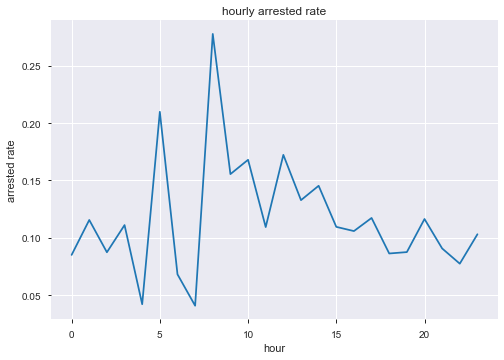

In [247]:
hourly_arrested_rate.plot()
plt.xlabel('hour')
plt.ylabel('arrested rate')
plt.title('hourly arrested rate')

- Observation: The above showed the arrested rate seems to be high in the early morning. Perhaps we shall look at stop_search rate

### Q5 Is the drug related cases on the rise? 

In [290]:
# First of all create a column called 'drug_offence' and make it a boolean


drug_offence_list = [(df['Legislation']=='Misuse of Drugs Act 1971 (section 23)') & (df['Outcome']!='A no further action disposal')]
drug_offence_list

[Date_Time
 2020-01-01 03:55:00+00:00    False
 2020-01-01 04:18:00+00:00    False
 2020-01-01 07:15:28+00:00    False
 2020-01-01 19:49:00+00:00    False
 2020-01-01 21:20:00+00:00    False
                              ...  
 2020-12-31 18:15:00+00:00    False
 2020-12-31 23:50:00+00:00    False
 2020-12-31 23:50:00+00:00    False
 2020-12-31 23:50:00+00:00    False
 2020-12-31 23:50:00+00:00    False
 Length: 8383, dtype: bool]

In [291]:
from numpy import array
drug_offence_list = np.array(drug_offence_list)
drug_offence_list.shape
drug_offence_list.shape=(8383,1)
df['drug_offence'] =drug_offence_list
df.head(3)

,Type,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Removal of more than just outer clothing,is_arrested,Hour,drug_offence,offence
Date_Time,,,,,,,,,,,,,,,,
2020-01-01 03:55:00+00:00,Person search,False,NaN,NaN,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False,False,3,False,False
2020-01-01 04:18:00+00:00,Person search,False,51.725023,-0.302372,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,Arrest,False,True,4,False,True
2020-01-01 07:15:28+00:00,Person search,False,NaN,NaN,Male,18-24,Asian/Asian British - Any other Asian background,Asian,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False,False,7,False,False


In [292]:
df.set_index('Date_Time',inplace=True)

KeyError: "None of ['Date_Time'] are in the columns"

In [293]:
month_drug_rate = df.drug_offence.resample('M').mean()

In [294]:
month_drug_rate

Date_Time
2020-01-31 00:00:00+00:00    0.186944
2020-02-29 00:00:00+00:00    0.153846
2020-03-31 00:00:00+00:00    0.159247
2020-04-30 00:00:00+00:00    0.228610
2020-05-31 00:00:00+00:00    0.176533
2020-06-30 00:00:00+00:00    0.154444
2020-07-31 00:00:00+00:00    0.159884
2020-08-31 00:00:00+00:00    0.174298
2020-09-30 00:00:00+00:00    0.185065
2020-10-31 00:00:00+00:00    0.172727
2020-11-30 00:00:00+00:00    0.195059
2020-12-31 00:00:00+00:00    0.187296
Freq: M, Name: drug_offence, dtype: float64

Text(0.5, 1.0, 'drug offence rate')

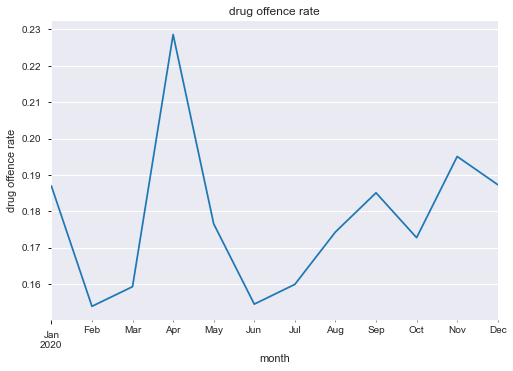

In [295]:
month_drug_rate.plot()
plt.xlabel('month')
plt.ylabel('drug offence rate')
plt.title('drug offence rate')


In [ ]:
### Observation: 
- The drug offence peaked in April just before the 1st lockdown, it suggested the users wanted to get more deals done before the lockdown.
- In june there was a climb when the 1st lockdown eased. It made sense. 

In [296]:
offence = [df['Outcome']!='A no further action disposal']
offence

[Date_Time
 2020-01-01 03:55:00+00:00    False
 2020-01-01 04:18:00+00:00     True
 2020-01-01 07:15:28+00:00    False
 2020-01-01 19:49:00+00:00    False
 2020-01-01 21:20:00+00:00    False
                              ...  
 2020-12-31 18:15:00+00:00    False
 2020-12-31 23:50:00+00:00    False
 2020-12-31 23:50:00+00:00    False
 2020-12-31 23:50:00+00:00    False
 2020-12-31 23:50:00+00:00    False
 Name: Outcome, Length: 8383, dtype: bool]

In [297]:
offence=np.array(offence)
offence.shape

(1, 8383)

In [298]:
offence.shape=(8383,1)
df['offence']=offence
df.head()

,Type,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Removal of more than just outer clothing,is_arrested,Hour,drug_offence,offence
Date_Time,,,,,,,,,,,,,,,,
2020-01-01 03:55:00+00:00,Person search,False,NaN,NaN,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False,False,3,False,False
2020-01-01 04:18:00+00:00,Person search,False,51.725023,-0.302372,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,Arrest,False,True,4,False,True
2020-01-01 07:15:28+00:00,Person search,False,NaN,NaN,Male,18-24,Asian/Asian British - Any other Asian background,Asian,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False,False,7,False,False
2020-01-01 19:49:00+00:00,Person search,True,NaN,NaN,Male,10-17,Mixed/Multiple ethnic groups - Any other Mixed...,Black,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,False,False,19,False,False
2020-01-01 21:20:00+00:00,Person and Vehicle search,False,NaN,NaN,Male,10-17,White - Any other White background,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False,21,False,False


In [299]:
month_offence_rate=df.offence.resample('M').mean()
month_offence_rate

Date_Time
2020-01-31 00:00:00+00:00    0.262611
2020-02-29 00:00:00+00:00    0.228797
2020-03-31 00:00:00+00:00    0.231164
2020-04-30 00:00:00+00:00    0.278075
2020-05-31 00:00:00+00:00    0.237844
2020-06-30 00:00:00+00:00    0.218889
2020-07-31 00:00:00+00:00    0.231105
2020-08-31 00:00:00+00:00    0.225997
2020-09-30 00:00:00+00:00    0.256494
2020-10-31 00:00:00+00:00    0.253030
2020-11-30 00:00:00+00:00    0.254876
2020-12-31 00:00:00+00:00    0.249186
Freq: M, Name: offence, dtype: float64

array([<AxesSubplot:xlabel='Date_Time'>, <AxesSubplot:xlabel='Date_Time'>],
      dtype=object)

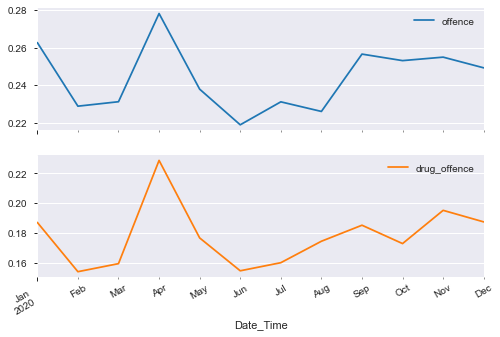

In [300]:
month = pd.concat([month_offence_rate, month_drug_rate],axis=1)
month.plot(subplots=True)

In [ ]:
### Observation:
The above seems to suggest these two types of crimes go hand in hand with each other. 

In [ ]:
Conclusion: 
    - In all suspect, the White has the highest stop_and_search rate.
    - Among them, they all have the same subsequent clear-up rate
    - The most likely crime female suspects is drug related, no evidence suggested them carry weapon. 
    - Most of the arrests happen in the morning during the day
    - Female suspect has 10% higher rate of let go than male suspect
    

### Test

In [ ]:
df.isnull().sum()

In [ ]:
df.info()